<h2>Importing Necessary Libraries</h2>

In [1]:
import os
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import cv2
import numpy as np
import numpy as np
from keras.preprocessing import image
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
from keras.models import load_model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

<h2>Training CNN and preprocessing on TUFTS face dataset</h2>

In [3]:
from PIL import Image

In [ ]:
def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

In [ ]:
def crop_max_square(pil_img):
    return crop_center(pil_img, min(pil_img.size), min(pil_img.size))

In [ ]:
img = Image.open('C:/Users/rutuj/Capstone project/TD_RGB_E/1/TD_RGB_E_1.jpg') # image extension *.png,*.jpg
# new_width  = 3000
# new_height = 3000
# img.thumbnail((new_width, new_height), Image.ANTIALIAS)
img = crop_max_square(img)
img.save('C:/Users/rutuj/Capstone project/TD_RGB_E/1/tempPhoto.jpg')

In [ ]:
# Directory
directory = "GeeksforGeeks"
  
# Parent Directory path
parent_dir = "D:/Pycharm projects/"
  
# Path
path = os.path.join(parent_dir, directory)
  
# Create the directory
# 'GeeksForGeeks' in
# '/home / User / Documents'
os.mkdir(path)

In [ ]:
for i in range(1, 114):
    directory = str(i)
    parent_dir = "C:/Users/rutuj/Capstone project/prepro_photos/"
    path = os.path.join(parent_dir, directory)
    dirlist = [name for name in os.listdir('TD_RGB_E/'+str(i)+'/')]
    if(len(dirlist) == 0):
        continue
    os.mkdir(path)
    for fName in dirlist:
        img = Image.open('C:/Users/rutuj/Capstone project/TD_RGB_E/' + str(i) +'/'+fName)
        img = crop_max_square(img)
        img.save('C:/Users/rutuj/Capstone project/prepro_photos/' + str(i) + '/'+fName)
#     for j in range(1,6):
#         img = Image.open('C:/Users/rutuj/Capstone project/TD_RGB_E/' + str(i) +'/TD_RGB_E_'+str(j)+'.jpg')
#         img = crop_max_square(img)
#         img.save('C:/Users/rutuj/Capstone project/prepro_photos/' + str(i) + '/TD_RGB_E_'+str(j)+'.jpg')

In [4]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(112, activation='softmax')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
TRAINING_DIR = "C:/Users/rutuj/Capstone project/prepro_photos/"
# train_datagen = ImageDataGenerator(rescale=1./255,
#       rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    target_size=(200, 200))

In [ ]:
history = model.fit(train_generator,
                              epochs=10,
                              verbose=1)

In [ ]:
model.save('model_V1.h5')

In [4]:
from keras.models import load_model

In [5]:
model = load_model('model_V1.h5')

In [6]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 33856)            

In [7]:
model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [8]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6_input (InputLayer)  [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 64)       

In [10]:
import cv2
import numpy as np

In [16]:
import numpy as np
from keras.preprocessing import image

In [17]:
path="C:/Users/rutuj/Capstone project/prepro_photos/1/TD_RGB_E_1.jpg"
img=image.load_img(path, target_size=(200, 200)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

path="C:/Users/rutuj/Capstone project/prepro_photos/2/TD_RGB_E_1.jpg"
img2=image.load_img(path, target_size=(200, 200)) # edit the target_size

y=image.img_to_array(img2)
y=np.expand_dims(y, axis=0)
myList = [];
myList.append(x);
myList.append(y)
images = np.vstack(myList)

classes = model.predict(images, batch_size=1)

In [ ]:
# import numpy as np
# from keras.preprocessing import image

# # predicting images
# fn = 'cat-2083492_640.jpg'  # name of the image
# path='/content/' + fn     # path to the image
# img=image.load_img(path, target_size=(150, 150)) # edit the target_size

# x=image.img_to_array(img)
# x=np.expand_dims(x, axis=0)
# images = np.vstack([x])

# classes = model.predict(images, batch_size=16) # edit the batch_size

# print(classes)

In [18]:
type(classes)

numpy.ndarray

In [19]:
len(classes)

2

In [20]:
classes

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [ ]:
print(len([name for name in os.listdir('lfw-deepfunneled/')]))

In [ ]:
nameDir = [name for name in os.listdir('lfw-deepfunneled/')]
cnt = 0
maxSize = 0
for fname in nameDir:
    dirList = [name for name in os.listdir('lfw-deepfunneled/'+fname+'/')]
    maxSize = max(maxSize, len(dirList))
    if len(dirList) >= 4:
        cnt += 1
print(cnt)
print(maxSize)

<h2>Training CNN and preprocessing on LFW face dataset</h2>

In [36]:
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle

In [ ]:
for fname in nameDir:
    directory = fname
    parent_dir = "C:/Users/rutuj/Capstone project/processed_photos/"
    path = os.path.join(parent_dir, directory)
    dirlist = [name for name in os.listdir('lfw-deepfunneled/'+fname+'/')]
    if(len(dirlist) < 4):
        continue
    os.mkdir(path)
    for i in range(4):
        fName = dirlist[i]
        img = Image.open('C:/Users/rutuj/Capstone project/lfw-deepfunneled/' + fname +'/'+fName)
        img = crop_max_square(img)
        img.save('C:/Users/rutuj/Capstone project/processed_photos/' + fname +'/'+fName)

In [5]:
# plot photo with detected faces using opencv cascade classifier
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
# load the photograph
pixels = imread('C:/Users/rutuj/Capstone project/processed_photos/Ben_Affleck/Ben_Affleck_0001.jpg')
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
    # extract
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # draw a rectangle over the pixels
    rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
    # save the image
#     img = Image.open('C:/Users/rutuj/Capstone project/processed_photos/Doris_Schroeder/Doris_Schroeder_0001.jpg')
    print(str(x) + " " + str(y) + ", " + str(x2) + " " + str(y2))
#     img.crop((x, y, x2, y2)).save('temp.jpg')

# show the image
imshow('face detection', pixels)
# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows()

61 64, 184 187


In [ ]:
min_height = 999999
min_width = 999999
my_set = set([])
nameDir = [name for name in os.listdir('lfw-deepfunneled/')]
for fname in nameDir:
    print(fname)
    directory = fname
    parent_dir = "C:/Users/rutuj/Capstone project/lfw-deepfunneled/"
    path = os.path.join(parent_dir, directory)
    dirlist = [name for name in os.listdir('lfw-deepfunneled/'+fname+'/')]
    cnt = 0;
    for fName in dirlist:
        pixels = imread('C:/Users/rutuj/Capstone project/lfw-deepfunneled/'+fname+'/'+fName)
        classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
        bboxes = classifier.detectMultiScale(pixels)
        if len(bboxes) == 0:
            continue
        box = bboxes[0]
        x, y, width, height = box
        x2, y2 = x + width, y + height
        if height < 100 or width < 100:
            continue
        min_width = min(min_width, width)
        min_height = min(min_height, height)
        cnt += 1
        if cnt >= 4:
            break
    if cnt >= 4:
        my_set.add(fname)
len(my_set)

In [ ]:
nameDir = [name for name in os.listdir('lfw-deepfunneled/')]
for fname in nameDir:
    if fname not in my_set:
        continue
    directory = fname
    parent_dir = "C:/Users/rutuj/Capstone project/bound_photos/"
    path = os.path.join(parent_dir, directory)
    os.mkdir(path)
    dirlist = [name for name in os.listdir('lfw-deepfunneled/'+fname+'/')]
    cnt = 0
    for fName in dirlist:
        pixels = imread('C:/Users/rutuj/Capstone project/lfw-deepfunneled/'+fname+'/'+fName)
        classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
        bboxes = classifier.detectMultiScale(pixels)
        if len(bboxes) == 0:
            continue
        box = bboxes[0]
        x, y, width, height = box
        x2, y2 = x + width, y + height
        if height < 100 or width < 100:
            continue
        cnt += 1
        img = Image.open('C:/Users/rutuj/Capstone project/lfw-deepfunneled/'+fname+'/'+fName)
        img.crop((x, y, x2, y2)).save('bound_photos/'+fname+'/'+fName)
        if cnt >= 4:
            break

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(523, activation='softmax')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [3]:
TRAINING_DIR = "C:/Users/rutuj/Capstone project/bound_photos/"
# train_datagen = ImageDataGenerator(rescale=1./255,
#       rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    target_size=(100, 100))

Found 2091 images belonging to 523 classes.


In [4]:
history = model.fit(train_generator,
                              epochs=40,
                              verbose=1)

Epoch 1/40
21/21 [==============================] - 7s 343ms/step - loss: 6.2728 - acc: 4.7824e-04
Epoch 2/40
21/21 [==============================] - 7s 322ms/step - loss: 6.2608 - acc: 0.0038
Epoch 3/40
21/21 [==============================] - 7s 355ms/step - loss: 6.2499 - acc: 0.0029
Epoch 4/40
21/21 [==============================] - 7s 324ms/step - loss: 6.1718 - acc: 0.0091
Epoch 5/40
21/21 [==============================] - 7s 352ms/step - loss: 5.9333 - acc: 0.0258
Epoch 6/40
21/21 [==============================] - 7s 323ms/step - loss: 5.5417 - acc: 0.0483
Epoch 7/40
21/21 [==============================] - 7s 349ms/step - loss: 4.9680 - acc: 0.0952
Epoch 8/40
21/21 [==============================] - 7s 331ms/step - loss: 4.3308 - acc: 0.1607
Epoch 9/40
21/21 [==============================] - 7s 351ms/step - loss: 3.6459 - acc: 0.2539
Epoch 10/40
21/21 [==============================] - 7s 328ms/step - loss: 2.9694 - acc: 0.3587
Epoch 11/40
21/21 [==========================

In [5]:
model.save('model_V2.h5')

In [9]:
from keras.models import load_model

In [10]:
model = load_model('model_V2.h5')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

<h2>Removing Final Classification Layer(Softmax layer) for the embedding layer</h2>

In [12]:
model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [13]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)       

In [161]:
nameDir = [name for name in os.listdir('bound_photos/')]
myList = []
for fname in nameDir:
    print(fname)
    dirlist = [name for name in os.listdir('bound_photos/'+fname+'/')]
    tempList = []
    for fName in dirlist:
        path='C:/Users/rutuj/Capstone project/bound_photos/'+fname+'/'+fName
        img=image.load_img(path, target_size=(100, 100)) # edit the target_size
        x=image.img_to_array(img)
        x=np.expand_dims(x, axis=0)
        prediction = model.predict(x)
        tempList.append(prediction[0].tolist())
    myList.append(tempList)

Aaron_Peirsol
Abdoulaye_Wade
Abdullah
Abdullah_Gul
Abel_Pacheco
Adrien_Brody
Ahmed_Chalabi
Ai_Sugiyama
Alan_Greenspan
Alastair_Campbell
Albert_Costa
Alec_Baldwin
Alejandro_Toledo
Alexander_Downer
Alexander_Losyukov
Ali_Naimi
Allyson_Felix
Alvaro_Silva_Calderon
Alvaro_Uribe
Al_Gore
Al_Sharpton
Amelia_Vega
Amelie_Mauresmo
Amer_al-Saadi
Ana_Guevara
Ana_Palacio
Anders_Fogh_Rasmussen
Andre_Agassi
Andy_Roddick
Angela_Bassett
Angela_Merkel
Angelina_Jolie
Anna_Kournikova
Ann_Veneman
Antonio_Banderas
Antonio_Palocci
Antony_Leung
Arianna_Huffington
Ariel_Sharon
Ari_Fleischer
Arminio_Fraga
Arnoldo_Aleman
Arnold_Schwarzenegger
Ashanti
Atal_Bihari_Vajpayee
Augustin_Calleri
Azra_Akin
Barbara_Walters
Benazir_Bhutto
Benjamin_Netanyahu
Ben_Affleck
Ben_Howland
Bernard_Landry
Bernard_Law
Billy_Crystal
Bill_Clinton
Bill_Frist
Bill_Gates
Bill_Graham
Bill_McBride
Bill_Paxton
Bill_Simon
Binyamin_Ben-Eliezer
Bob_Graham
Bob_Hope
Bob_Huggins
Bob_Stoops
Boris_Becker
Brad_Johnson
Britney_Spears
Bruce_Springsteen


In [162]:
len(myList)

522

In [163]:
len(myList[0])

4

In [71]:
myList[0]

[[1390.9932861328125,
  4284.5087890625,
  2182.4833984375,
  729.2327880859375,
  1386.5546875,
  877.1369018554688,
  751.0031127929688,
  0.0,
  0.0,
  4094.59130859375,
  3521.9462890625,
  0.0,
  3328.956298828125,
  2288.4423828125,
  0.0,
  2569.21728515625,
  0.0,
  2733.765869140625,
  940.0643920898438,
  2112.239990234375,
  2440.628662109375,
  3350.426513671875,
  1451.060791015625,
  1779.822509765625,
  1369.5479736328125,
  1502.7674560546875,
  0.0,
  0.0,
  644.4212036132812,
  3664.315673828125,
  3102.457763671875,
  2514.284912109375,
  1161.5712890625,
  0.0,
  0.0,
  0.0,
  2156.571533203125,
  5045.3916015625,
  2825.875,
  0.0,
  292.5119934082031,
  2828.015869140625,
  1348.4910888671875,
  5232.7177734375,
  1917.35595703125,
  3040.40771484375,
  3674.759033203125,
  0.0,
  0.0,
  758.0057373046875,
  1461.1131591796875,
  3854.646484375,
  2067.5810546875,
  3064.56298828125,
  1486.564208984375,
  0.0,
  0.0,
  3455.408935546875,
  781.4566040039062,
  45

In [37]:
path="C:/Users/rutuj/Capstone project/bound_photos/Aaron_Peirsol/Aaron_Peirsol_0001.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction = model.predict(x)

In [38]:
type(prediction[0])

numpy.ndarray

In [31]:
prediction.dtype

dtype('float32')

In [59]:
onelist = []
onelist.append(prediction[0].tolist())
twolist = []
twolist.append(onelist);

In [60]:
s = str(prediction[0].tolist())
s

'[1390.9932861328125, 4284.5087890625, 2182.4833984375, 729.2327880859375, 1386.5546875, 877.1369018554688, 751.0031127929688, 0.0, 0.0, 4094.59130859375, 3521.9462890625, 0.0, 3328.956298828125, 2288.4423828125, 0.0, 2569.21728515625, 0.0, 2733.765869140625, 940.0643920898438, 2112.239990234375, 2440.628662109375, 3350.426513671875, 1451.060791015625, 1779.822509765625, 1369.5479736328125, 1502.7674560546875, 0.0, 0.0, 644.4212036132812, 3664.315673828125, 3102.457763671875, 2514.284912109375, 1161.5712890625, 0.0, 0.0, 0.0, 2156.571533203125, 5045.3916015625, 2825.875, 0.0, 292.5119934082031, 2828.015869140625, 1348.4910888671875, 5232.7177734375, 1917.35595703125, 3040.40771484375, 3674.759033203125, 0.0, 0.0, 758.0057373046875, 1461.1131591796875, 3854.646484375, 2067.5810546875, 3064.56298828125, 1486.564208984375, 0.0, 0.0, 3455.408935546875, 781.4566040039062, 452.4599914550781, 2276.267333984375, 203.87246704101562, 0.0, 1390.79833984375, 268.6896667480469, 2971.7509765625, 108

In [62]:
type(eval(s))

list

In [11]:
import pandas as pd

In [165]:
df = pd.DataFrame(myList, columns = ['photo_1', 'photo_2','photo_3', 'photo_4'])

In [166]:
df.head()

,photo_1,photo_2,photo_3,photo_4
0,"[1390.9932861328125, 4284.5087890625, 2182.483...","[2233.82373046875, 3782.5625, 2059.45458984375...","[2928.8876953125, 4992.47119140625, 3445.85571...","[5092.46435546875, 3944.844970703125, 367.6594..."
1,"[186.30831909179688, 163.41323852539062, 0.0, ...","[2262.142578125, 3328.427734375, 817.736572265...","[0.0, 1219.69287109375, 0.0, 545.9422607421875...","[2772.635009765625, 2868.19580078125, 0.0, 454..."
2,"[4290.705078125, 2540.52099609375, 679.5321655...","[2964.18701171875, 0.0, 0.0, 1699.35595703125,...","[3075.74169921875, 0.0, 638.1261596679688, 0.0...","[3062.874267578125, 2941.6181640625, 0.0, 455...."
3,"[0.0, 0.0, 0.0, 869.7342529296875, 5178.092285...","[0.0, 0.0, 1181.9412841796875, 3018.9311523437...","[0.0, 1399.033935546875, 0.0, 4379.68701171875...","[0.0, 0.0, 1588.4312744140625, 2556.7709960937..."
4,"[1717.684814453125, 880.0585327148438, 0.0, 46...","[1973.208251953125, 941.2030029296875, 509.184...","[299.7462463378906, 0.0, 0.0, 1093.34826660156...","[3503.88623046875, 1390.1639404296875, 1837.60..."


In [88]:
df['photo_1'][12]

array([1065.4714  , 2485.6438  ,  722.3996  , 2425.7349  , 1741.5963  ,
        648.35443 , 1545.7335  ,    0.      ,    0.      ,    0.      ,
       1851.9015  ,    0.      , 1283.3458  , 5337.9336  ,    0.      ,
        713.9419  ,  972.3173  ,    0.      ,  493.055   ,  906.87775 ,
          0.      , 2900.2944  ,  977.1222  , 2140.7766  ,  102.2348  ,
        987.53265 , 2439.2034  ,    0.      , 2647.5159  , 1419.5319  ,
       3559.426   , 1166.3064  , 1747.527   ,    0.      ,    0.      ,
        344.48578 , 1187.1705  , 1715.0208  , 2424.299   ,    0.      ,
          0.      , 2820.3574  ,    0.      , 1825.8451  ,    0.      ,
       2369.3174  ,  501.00467 ,    0.      ,    0.      , 1601.8864  ,
       1580.306   , 1984.5911  , 2479.6804  , 1554.2345  ,  711.507   ,
        626.8727  ,  272.6308  ,  901.4597  ,    0.      ,    0.      ,
          0.      ,   86.604065,  134.51074 ,  618.26105 ,   82.41171 ,
       2699.1418  ,  450.17188 , 3185.3406  ,    0.      , 2569.

In [102]:
df.to_csv('encodings.csv',index=False)

In [103]:
df2 = pd.read_csv('encodings.csv')

In [104]:
df2.head()

,photo_1,photo_2,photo_3,photo_4
0,[1.3909933e+03 4.2845088e+03 2.1824834e+03 7.2...,[2233.8237 3782.5625 2059.4546 603.4653...,[2.92888770e+03 4.99247119e+03 3.44585571e+03 ...,[5092.4644 3944.845 367.65942 0. ...
1,[1.8630832e+02 1.6341324e+02 0.0000000e+00 5.4...,[2262.1426 3328.4277 817.7366 4049.184 4...,[ 0. 1219.6929 0. 545.9422...,[2.7726350e+03 2.8681958e+03 0.0000000e+00 4.5...
2,[4290.705 2540.521 679.53217 0. 4...,[2964.187 0. 0. 1699.356 ...,[3075.7417 0. 638.12616 0. ...,[3062.8743 2941.6182 0. 455.3214 4...
3,[ 0. 0. 0. 869.73425 5...,[0.0000000e+00 0.0000000e+00 1.1819413e+03 3.0...,[ 0. 1399.0339 0. 4379.687...,[ 0. 0. 1588.4313 2556.771 3...
4,[1717.6848 880.05853 0. 4698.7656...,[1.97320825e+03 9.41203003e+02 5.09184143e+02 ...,[2.99746246e+02 0.00000000e+00 0.00000000e+00 ...,[ 3503.8862 1390.164 1837.6066 8008....


In [100]:
df2.shape

(523, 5)

In [167]:
df.to_csv('encodings_no_header.csv',index=False,header=False)

In [168]:
df3 = pd.read_csv('encodings_no_header.csv')

In [109]:
df['photo_1'][12].shape

(128,)

In [169]:
df4 = pd.DataFrame(myList)

In [170]:
df4

,0,1,2,3
0,"[1390.9932861328125, 4284.5087890625, 2182.483...","[2233.82373046875, 3782.5625, 2059.45458984375...","[2928.8876953125, 4992.47119140625, 3445.85571...","[5092.46435546875, 3944.844970703125, 367.6594..."
1,"[186.30831909179688, 163.41323852539062, 0.0, ...","[2262.142578125, 3328.427734375, 817.736572265...","[0.0, 1219.69287109375, 0.0, 545.9422607421875...","[2772.635009765625, 2868.19580078125, 0.0, 454..."
2,"[4290.705078125, 2540.52099609375, 679.5321655...","[2964.18701171875, 0.0, 0.0, 1699.35595703125,...","[3075.74169921875, 0.0, 638.1261596679688, 0.0...","[3062.874267578125, 2941.6181640625, 0.0, 455...."
3,"[0.0, 0.0, 0.0, 869.7342529296875, 5178.092285...","[0.0, 0.0, 1181.9412841796875, 3018.9311523437...","[0.0, 1399.033935546875, 0.0, 4379.68701171875...","[0.0, 0.0, 1588.4312744140625, 2556.7709960937..."
4,"[1717.684814453125, 880.0585327148438, 0.0, 46...","[1973.208251953125, 941.2030029296875, 509.184...","[299.7462463378906, 0.0, 0.0, 1093.34826660156...","[3503.88623046875, 1390.1639404296875, 1837.60..."
...,...,...,...,...
517,"[2724.325439453125, 697.2234497070312, 1782.99...","[5179.22314453125, 3608.333740234375, 1274.456...","[4870.6552734375, 1196.170166015625, 423.81750...","[3008.2177734375, 741.3729858398438, 3292.6967..."
518,"[0.0, 2069.454833984375, 5933.232421875, 4938....","[2427.228515625, 1835.786865234375, 1371.96887...","[5434.57470703125, 4126.41650390625, 1339.0491...","[5329.1875, 0.0, 23.64558219909668, 6949.57470..."
519,"[47.24895095825195, 271.0113830566406, 0.0, 34...","[1109.6842041015625, 2145.4521484375, 2714.175...","[3112.23291015625, 6829.212890625, 2492.483886...","[3386.327392578125, 1252.04345703125, 3350.240..."
520,"[1346.771484375, 408.56524658203125, 0.0, 5531...","[2805.692138671875, 1917.89208984375, 0.0, 0.0...","[2565.7021484375, 2601.02197265625, 0.0, 220.6...","[4483.1396484375, 1820.780517578125, 0.0, 1063..."


In [172]:
df4.to_csv('encodings_no_col_name.csv',index=False)

In [173]:
df5 = pd.read_csv('encodings_no_col_name.csv')

In [174]:
df5

,0,1,2,3
0,"[1390.9932861328125, 4284.5087890625, 2182.483...","[2233.82373046875, 3782.5625, 2059.45458984375...","[2928.8876953125, 4992.47119140625, 3445.85571...","[5092.46435546875, 3944.844970703125, 367.6594..."
1,"[186.30831909179688, 163.41323852539062, 0.0, ...","[2262.142578125, 3328.427734375, 817.736572265...","[0.0, 1219.69287109375, 0.0, 545.9422607421875...","[2772.635009765625, 2868.19580078125, 0.0, 454..."
2,"[4290.705078125, 2540.52099609375, 679.5321655...","[2964.18701171875, 0.0, 0.0, 1699.35595703125,...","[3075.74169921875, 0.0, 638.1261596679688, 0.0...","[3062.874267578125, 2941.6181640625, 0.0, 455...."
3,"[0.0, 0.0, 0.0, 869.7342529296875, 5178.092285...","[0.0, 0.0, 1181.9412841796875, 3018.9311523437...","[0.0, 1399.033935546875, 0.0, 4379.68701171875...","[0.0, 0.0, 1588.4312744140625, 2556.7709960937..."
4,"[1717.684814453125, 880.0585327148438, 0.0, 46...","[1973.208251953125, 941.2030029296875, 509.184...","[299.7462463378906, 0.0, 0.0, 1093.34826660156...","[3503.88623046875, 1390.1639404296875, 1837.60..."
...,...,...,...,...
517,"[2724.325439453125, 697.2234497070312, 1782.99...","[5179.22314453125, 3608.333740234375, 1274.456...","[4870.6552734375, 1196.170166015625, 423.81750...","[3008.2177734375, 741.3729858398438, 3292.6967..."
518,"[0.0, 2069.454833984375, 5933.232421875, 4938....","[2427.228515625, 1835.786865234375, 1371.96887...","[5434.57470703125, 4126.41650390625, 1339.0491...","[5329.1875, 0.0, 23.64558219909668, 6949.57470..."
519,"[47.24895095825195, 271.0113830566406, 0.0, 34...","[1109.6842041015625, 2145.4521484375, 2714.175...","[3112.23291015625, 6829.212890625, 2492.483886...","[3386.327392578125, 1252.04345703125, 3350.240..."
520,"[1346.771484375, 408.56524658203125, 0.0, 5531...","[2805.692138671875, 1917.89208984375, 0.0, 0.0...","[2565.7021484375, 2601.02197265625, 0.0, 220.6...","[4483.1396484375, 1820.780517578125, 0.0, 1063..."


In [114]:
df5.dtypes

0    object
1    object
2    object
3    object
dtype: object

In [175]:
df5.isna().sum().sum()

0

In [90]:
type(df5['1'][0])

str

In [147]:
df5.iloc[0,1]

'[2233.82373046875, 3782.5625, 2059.45458984375, 603.46533203125, 157.76190185546875, 0.0, 0.0, 133.3256378173828, 0.0, 2962.356689453125, 2090.947021484375, 0.0, 1218.6973876953125, 612.970458984375, 0.0, 1120.35986328125, 821.50732421875, 764.7460327148438, 1129.66796875, 1635.5245361328125, 334.16204833984375, 1028.9759521484375, 1367.15087890625, 1730.359375, 267.1495361328125, 1659.7305908203125, 365.231201171875, 0.0, 2337.51513671875, 2752.168212890625, 1780.14794921875, 1108.0653076171875, 1282.946044921875, 453.9409484863281, 0.0, 0.0, 0.0, 1201.6346435546875, 159.44007873535156, 0.0, 0.0, 2922.022705078125, 639.89697265625, 2048.512939453125, 273.08123779296875, 1632.3714599609375, 917.4127807617188, 0.0, 0.0, 2721.681884765625, 923.212890625, 3210.8525390625, 0.0, 404.13421630859375, 1152.3782958984375, 333.01312255859375, 610.7877807617188, 1797.4110107421875, 194.20770263671875, 0.0, 374.4208679199219, 0.0, 653.2998046875, 0.0, 1695.2777099609375, 1267.6015625, 673.3092041

In [92]:
eval(df5.iloc[0,0])

[1390.9932861328125,
 4284.5087890625,
 2182.4833984375,
 729.2327880859375,
 1386.5546875,
 877.1369018554688,
 751.0031127929688,
 0.0,
 0.0,
 4094.59130859375,
 3521.9462890625,
 0.0,
 3328.956298828125,
 2288.4423828125,
 0.0,
 2569.21728515625,
 0.0,
 2733.765869140625,
 940.0643920898438,
 2112.239990234375,
 2440.628662109375,
 3350.426513671875,
 1451.060791015625,
 1779.822509765625,
 1369.5479736328125,
 1502.7674560546875,
 0.0,
 0.0,
 644.4212036132812,
 3664.315673828125,
 3102.457763671875,
 2514.284912109375,
 1161.5712890625,
 0.0,
 0.0,
 0.0,
 2156.571533203125,
 5045.3916015625,
 2825.875,
 0.0,
 292.5119934082031,
 2828.015869140625,
 1348.4910888671875,
 5232.7177734375,
 1917.35595703125,
 3040.40771484375,
 3674.759033203125,
 0.0,
 0.0,
 758.0057373046875,
 1461.1131591796875,
 3854.646484375,
 2067.5810546875,
 3064.56298828125,
 1486.564208984375,
 0.0,
 0.0,
 3455.408935546875,
 781.4566040039062,
 452.4599914550781,
 2276.267333984375,
 203.87246704101562,
 0

In [82]:
type(df5.iloc[0,0])

str

In [12]:
import random
random.sample(range(1, 100), 3)

[51, 59, 4]

In [96]:
print("positive", end = " ")
print("negative")

positive negative


In [111]:
for i in range(6,522):
    print("positive", end = " ")
    for j in range(1,4):
        for k in range(j):
            print(str(j)+" "+str(k), end = ", ")
    print("\n negative", end = " ");
    for elem in random.sample(range(0, i), 6):
        print(str(i)+" "+str(elem), end = ", ")
    print("\n")

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 6 4, 6 5, 6 1, 6 3, 6 0, 6 2, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 7 6, 7 0, 7 4, 7 3, 7 2, 7 5, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 8 1, 8 3, 8 0, 8 7, 8 6, 8 5, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 9 8, 9 0, 9 2, 9 6, 9 3, 9 4, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 10 4, 10 9, 10 3, 10 1, 10 7, 10 8, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 11 0, 11 8, 11 10, 11 3, 11 4, 11 1, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 12 5, 12 6, 12 1, 12 9, 12 10, 12 2, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 13 5, 13 4, 13 12, 13 3, 13 6, 13 0, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 14 8, 14 1, 14 7, 14 10, 14 3, 14 9, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 15 3, 15 9, 15 0, 15 1, 15 5, 15 8, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 16 2, 16 0, 16 1, 16 10, 16 3, 16 13, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 215 106, 215 170, 215 110, 215 161, 215 120, 215 99, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 216 151, 216 67, 216 212, 216 101, 216 98, 216 191, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 217 65, 217 45, 217 192, 217 43, 217 53, 217 210, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 218 114, 218 75, 218 91, 218 25, 218 160, 218 51, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 219 102, 219 208, 219 32, 219 132, 219 99, 219 151, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 220 80, 220 162, 220 47, 220 202, 220 147, 220 15, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 221 110, 221 177, 221 5, 221 210, 221 47, 221 169, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 222 69, 222 163, 222 73, 222 144, 222 159, 222 113, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 223 7, 223 220, 223 98, 223 222, 223 199, 223 83, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 224 74, 224 52, 224 1

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 415 381, 415 78, 415 278, 415 257, 415 37, 415 314, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 416 246, 416 168, 416 306, 416 284, 416 384, 416 120, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 417 321, 417 192, 417 267, 417 55, 417 34, 417 181, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 418 30, 418 116, 418 189, 418 222, 418 112, 418 350, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 419 360, 419 75, 419 316, 419 337, 419 101, 419 355, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 420 327, 420 127, 420 342, 420 286, 420 193, 420 170, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 421 307, 421 69, 421 229, 421 245, 421 334, 421 246, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 422 66, 422 402, 422 358, 422 224, 422 270, 422 227, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 423 345, 423 13, 423 404, 423 93, 423 171, 423 406, 

positive 1 0, 2 0, 2 1, 3 0, 3 1, 3 2, 
 negative 424 79

In [180]:
myListX = []
myListY = []

In [181]:
for i in range(6,522):
    tempTrain = []
    tempTest = []
    for j in range(1,4):
        for k in range(j):
            tempList1 = eval(df5.iloc[i,j]);
            tempList2 = eval(df5.iloc[i,k]);
            tempList1.extend(tempList2)
            myListX.append(tempList1)
            myListY.append(1)
    for elem in random.sample(range(0, i), 6):
        tempList1 = eval(df5.iloc[i,random.randint(0,3)]);
        tempList2 = eval(df5.iloc[elem,random.randint(0,3)]);
        tempList1.extend(tempList2)
        myListX.append(tempList1)
        myListY.append(0)

In [184]:
len(myListY)

6192

In [186]:
from collections import Counter
Counter(myListY)

Counter({1: 3096, 0: 3096})

In [187]:
dfY = pd.DataFrame(myListY)
dfY

,0
0,1
1,1
2,1
3,1
4,1
...,...
6187,0
6188,0
6189,0
6190,0


In [188]:
dfY.to_csv('output.csv',index=False)

In [189]:
dfX = pd.DataFrame(myListX)
dfX

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,4597.121582,1603.959839,0.000000,2529.982666,994.274841,2155.856934,3701.645020,1624.135620,0.0,1408.306641,...,1212.733643,0.0,165.297592,2215.821289,0.0,969.109070,0.000000,4605.928223,0.0,0.000000
1,1970.269897,532.039246,319.529816,723.193604,1484.467773,2756.254395,2598.160156,840.329224,0.0,2702.380371,...,1212.733643,0.0,165.297592,2215.821289,0.0,969.109070,0.000000,4605.928223,0.0,0.000000
2,1970.269897,532.039246,319.529816,723.193604,1484.467773,2756.254395,2598.160156,840.329224,0.0,2702.380371,...,0.000000,0.0,678.272827,3622.406250,0.0,989.502808,3339.596436,6538.684570,0.0,0.000000
3,5315.962402,2544.526611,0.000000,2433.974121,4388.512695,7464.981445,3064.507812,2199.100586,0.0,3441.185059,...,1212.733643,0.0,165.297592,2215.821289,0.0,969.109070,0.000000,4605.928223,0.0,0.000000
4,5315.962402,2544.526611,0.000000,2433.974121,4388.512695,7464.981445,3064.507812,2199.100586,0.0,3441.185059,...,0.000000,0.0,678.272827,3622.406250,0.0,989.502808,3339.596436,6538.684570,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6187,861.062439,491.930542,0.000000,121.380196,3461.631836,4208.044922,2384.105713,0.000000,0.0,1953.826660,...,4891.471191,0.0,192.585983,2722.928711,0.0,3736.620850,0.000000,3596.719238,0.0,136.679123
6188,5261.725586,6812.491211,665.910767,2474.670166,0.000000,0.000000,3847.605469,0.000000,0.0,26.543932,...,4937.235352,0.0,0.000000,2154.437744,0.0,1197.541992,905.429688,4791.404297,0.0,653.485474
6189,4930.516602,4042.049805,0.000000,1289.670044,0.000000,3249.510254,3661.820312,1709.596436,0.0,1560.420776,...,4411.260742,0.0,0.000000,232.101212,0.0,3278.148926,733.496948,4081.925781,0.0,1329.097534
6190,2781.530518,4081.033203,282.919678,2393.680908,0.000000,0.000000,2263.023682,0.000000,0.0,0.000000,...,2749.141113,0.0,139.249191,4716.979004,0.0,1510.330688,1466.959961,5473.597656,0.0,2913.352051


In [190]:
dfX.to_csv('input.csv',index=False)

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [14]:
data = pd.read_csv('input.csv')
data

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,4597.121582,1603.959839,0.000000,2529.982666,994.274841,2155.856934,3701.645020,1624.135620,0.0,1408.306641,...,1212.733643,0.0,165.297592,2215.821289,0.0,969.109070,0.000000,4605.928223,0.0,0.000000
1,1970.269897,532.039246,319.529816,723.193604,1484.467773,2756.254395,2598.160156,840.329224,0.0,2702.380371,...,1212.733643,0.0,165.297592,2215.821289,0.0,969.109070,0.000000,4605.928223,0.0,0.000000
2,1970.269897,532.039246,319.529816,723.193604,1484.467773,2756.254395,2598.160156,840.329224,0.0,2702.380371,...,0.000000,0.0,678.272827,3622.406250,0.0,989.502808,3339.596436,6538.684570,0.0,0.000000
3,5315.962402,2544.526611,0.000000,2433.974121,4388.512695,7464.981445,3064.507812,2199.100586,0.0,3441.185059,...,1212.733643,0.0,165.297592,2215.821289,0.0,969.109070,0.000000,4605.928223,0.0,0.000000
4,5315.962402,2544.526611,0.000000,2433.974121,4388.512695,7464.981445,3064.507812,2199.100586,0.0,3441.185059,...,0.000000,0.0,678.272827,3622.406250,0.0,989.502808,3339.596436,6538.684570,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6187,861.062439,491.930542,0.000000,121.380196,3461.631836,4208.044922,2384.105713,0.000000,0.0,1953.826660,...,4891.471191,0.0,192.585983,2722.928711,0.0,3736.620850,0.000000,3596.719238,0.0,136.679123
6188,5261.725586,6812.491211,665.910767,2474.670166,0.000000,0.000000,3847.605469,0.000000,0.0,26.543932,...,4937.235352,0.0,0.000000,2154.437744,0.0,1197.541992,905.429688,4791.404297,0.0,653.485474
6189,4930.516602,4042.049805,0.000000,1289.670044,0.000000,3249.510254,3661.820312,1709.596436,0.0,1560.420776,...,4411.260742,0.0,0.000000,232.101212,0.0,3278.148926,733.496948,4081.925781,0.0,1329.097534
6190,2781.530518,4081.033203,282.919678,2393.680908,0.000000,0.000000,2263.023682,0.000000,0.0,0.000000,...,2749.141113,0.0,139.249191,4716.979004,0.0,1510.330688,1466.959961,5473.597656,0.0,2913.352051


In [15]:
X = data.to_numpy(dtype='float32')
X

array([[4597.1216 , 1603.9598 ,    0.     , ..., 4605.928  ,    0.     ,
           0.     ],
       [1970.2699 ,  532.03925,  319.52982, ..., 4605.928  ,    0.     ,
           0.     ],
       [1970.2699 ,  532.03925,  319.52982, ..., 6538.6846 ,    0.     ,
           0.     ],
       ...,
       [4930.5166 , 4042.0498 ,    0.     , ..., 4081.9258 ,    0.     ,
        1329.0975 ],
       [2781.5305 , 4081.0332 ,  282.91968, ..., 5473.5977 ,    0.     ,
        2913.352  ],
       [5261.7256 , 6812.491  ,  665.91077, ..., 4861.702  ,    0.     ,
        1421.7758 ]], dtype=float32)

In [16]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [17]:
X

array([[0.22231758, 0.1217958 , 0.        , ..., 0.275982  , 0.        ,
        0.        ],
       [0.09528258, 0.0404001 , 0.03027562, ..., 0.275982  , 0.        ,
        0.        ],
       [0.09528258, 0.0404001 , 0.03027562, ..., 0.39179057, 0.        ,
        0.        ],
       ...,
       [0.23844062, 0.30693078, 0.        , ..., 0.24458437, 0.        ,
        0.06649072],
       [0.13451529, 0.309891  , 0.02680679, ..., 0.3279718 , 0.        ,
        0.14574616],
       [0.25445795, 0.5173027 , 0.0630954 , ..., 0.2913077 , 0.        ,
        0.07112712]], dtype=float32)

In [13]:
X.shape

(6192, 256)

In [23]:
output = pd.read_csv('output.csv')
output

,0
0,1
1,1
2,1
3,1
4,1
...,...
6187,0
6188,0
6189,0
6190,0


In [24]:
y = output.to_numpy(dtype='float32')
y

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(300, input_shape=(256,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(400, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(500, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(400, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(400, input_shape=(256,)),
    tf.keras.layers.Dense(600, activation=tf.nn.relu),
    tf.keras.layers.Dense(800, activation=tf.nn.relu),
    tf.keras.layers.Dense(800, activation=tf.nn.relu),
    tf.keras.layers.Dense(600, activation=tf.nn.relu),
    tf.keras.layers.Dense(400, activation=tf.nn.relu),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(400, input_shape=(256,)),
    tf.keras.layers.Dense(600, activation=tf.nn.relu),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [27]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               102800    
_________________________________________________________________
dense_1 (Dense)              (None, 600)               240600    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               120200    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 463,801
Trainable params: 463,801
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(X_train,y_train, validation_split=0.1, epochs=40)

Epoch 1/40
157/157 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.5901 - val_loss: 0.6010 - val_accuracy: 0.6900
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.5682 - accuracy: 0.7044 - val_loss: 0.5401 - val_accuracy: 0.7168
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.7625 - val_loss: 0.5096 - val_accuracy: 0.7616
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.7956 - val_loss: 0.5390 - val_accuracy: 0.7401
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3863 - accuracy: 0.8281 - val_loss: 0.4898 - val_accuracy: 0.7634
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.8440 - val_loss: 0.4964 - val_accuracy: 0.7581
Epoch 7/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3024 - accuracy: 0.8694 - val_loss: 0.5006 - val_accuracy: 0.7921
Epoch 

In [30]:
model.save('final_NN.h5')

In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(400, input_shape=(256,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(600, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(800, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(800, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(600, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(400, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [76]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(400, input_shape=(256,)),
    tf.keras.layers.Dense(600, activation=tf.nn.relu),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
y_pred = model.predict_classes(X_test,verbose = 1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
20/20 [==============================] - 0s 2ms/step


In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       318
         1.0       0.77      0.80      0.79       302

    accuracy                           0.79       620
   macro avg       0.79      0.79      0.79       620
weighted avg       0.79      0.79      0.79       620



In [6]:
path="C:/Users/rutuj/Capstone project/bound_photos/Aaron_Peirsol/Aaron_Peirsol_0001.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

In [7]:
x.shape

(1, 100, 100, 3)

In [9]:
type(img)

PIL.Image.Image

In [13]:
np.array(Image.open(path)).shape

(126, 126, 3)

In [19]:
filelist = []

In [20]:
for i in range(4):
    path="C:/Users/rutuj/Capstone project/bound_photos/Aaron_Peirsol/Aaron_Peirsol_000"+str(i+1)+".jpg"
    filelist.append(path)

In [23]:
x = np.array([np.array(Image.open(fname)) for fname in filelist])

C:\Users\rutuj\AppData\Local\Temp/ipykernel_18576/995216768.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x = np.array([np.array(Image.open(fname)) for fname in filelist])


In [24]:
x

array([array([[[190, 177, 145],
        [165, 152, 120],
        [132, 119,  87],
        ...,
        [175, 158, 106],
        [188, 172, 121],
        [196, 180, 129]],

       [[177, 164, 132],
        [153, 140, 108],
        [121, 108,  74],
        ...,
        [166, 148,  98],
        [179, 163, 112],
        [188, 172, 123]],

       [[159, 146, 112],
        [137, 124,  90],
        [110,  97,  63],
        ...,
        [154, 136,  86],
        [168, 152, 103],
        [179, 163, 114]],

       ...,

       [[204, 140,  53],
        [201, 137,  49],
        [199, 138,  45],
        ...,
        [242, 242, 242],
        [242, 242, 242],
        [242, 242, 242]],

       [[191, 127,  39],
        [187, 123,  33],
        [184, 123,  30],
        ...,
        [242, 242, 242],
        [242, 242, 242],
        [242, 242, 242]],

       [[180, 116,  28],
        [175, 111,  21],
        [172, 111,  18],
        ...,
        [242, 242, 242],
        [242, 242, 242],
        [242, 242

In [ ]:
image.img_to_array(image.load_img(path, target_size=(100, 100)))

In [25]:
x = np.array([image.img_to_array(image.load_img(fname, target_size=(100, 100))) for fname in filelist])

In [26]:
x.shape

(4, 100, 100, 3)

In [40]:
nameDir = [name for name in os.listdir('test_images/')]
for fname in nameDir:
    directory = fname
    parent_dir = "C:/Users/rutuj/Capstone project/test_images_processed/"
    path = os.path.join(parent_dir, directory)
    os.mkdir(path)
    dirlist = [name for name in os.listdir('test_images/'+fname+'/')]
    for fName in dirlist:
        pixels = imread('C:/Users/rutuj/Capstone project/test_images/'+fname+'/'+fName)
        classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
        bboxes = classifier.detectMultiScale(pixels)
        if len(bboxes) == 0:
            continue
        box = bboxes[0]
        x, y, width, height = box
        x2, y2 = x + width, y + height
        if height < 100 or width < 100:
            continue
        img = Image.open('C:/Users/rutuj/Capstone project/test_images/'+fname+'/'+fName)
        img.crop((x, y, x2, y2)).save('test_images_processed/'+fname+'/'+fName)

In [17]:
path="C:/Users/rutuj/Capstone project/test_images_processed/Chris_evans/Chris_evans.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction = model.predict(x)

In [18]:
prediction

array([[3193.2175   , 1531.9562   , 2158.9026   , 2077.4548   ,
        8186.925    ,  207.19794  , 3566.5383   , 2668.3113   ,
           0.       ,    0.       , 7365.9526   ,    0.       ,
        7367.6465   , 3427.6458   ,    0.       ,  119.46068  ,
         693.10394  ,    0.       , 4786.5493   ,  178.5426   ,
        1292.7496   , 5446.811    , 2989.6558   ,  334.73972  ,
        4921.7896   , 2218.9517   , 3170.9048   ,    0.       ,
        5812.9385   ,    0.       , 3350.7832   ,  878.6485   ,
        3317.1274   ,    0.       ,    0.       , 3909.2695   ,
        4811.5986   , 4655.067    , 5615.757    ,  598.1967   ,
        2910.6343   ,    0.       , 2437.3413   , 6017.958    ,
        1394.3333   ,    0.       ,    0.       ,    0.       ,
           0.       ,    0.       , 4548.4688   ,    0.       ,
        3116.2217   , 3794.76     , 3146.8882   ,    0.       ,
        1976.2946   , 4725.02     ,    0.       , 2696.2905   ,
        6533.832    ,    0.       ,   12

In [18]:
model2 = load_model('final_NN.h5')

In [44]:
predLast = model2.predict_classes(embed)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [45]:
predLast = (model2.predict(embed) > 0.5).astype("int32")

In [46]:
predLast

array([[1]])

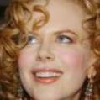

In [51]:
path="C:/Users/rutuj/Capstone project/bound_photos/Nicole_Kidman/Nicole_Kidman_0004.jpg"
img=image.load_img(path, target_size=(100, 100))
img

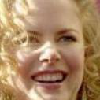

In [52]:
path="C:/Users/rutuj/Capstone project/bound_photos/Nicole_Kidman/Nicole_Kidman_0005.jpg"
img=image.load_img(path, target_size=(100, 100))
img

In [53]:
path="C:/Users/rutuj/Capstone project/bound_photos/Nicole_Kidman/Nicole_Kidman_0004.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction1 = model.predict(x)

path="C:/Users/rutuj/Capstone project/bound_photos/Nicole_Kidman/Nicole_Kidman_0005.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction2 = model.predict(x)

pred1 = prediction1.tolist()
pred2 = prediction2.tolist()
pred1 = pred1[0]
pred2 = pred2[0]

pred1.extend(pred2)
embed = np.array(pred1)
embed.reshape((1, 256)).shape
embed = min_max_scaler.transform(embed.reshape((1, 256)))

predLast = (model2.predict(embed) > 0.5).astype("int32")
predLast

array([[1]])

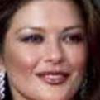

In [54]:
path="C:/Users/rutuj/Capstone project/bound_photos/Catherine_Zeta-Jones/Catherine_Zeta-Jones_0001.jpg"
img=image.load_img(path, target_size=(100, 100))
img

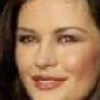

In [55]:
path="C:/Users/rutuj/Capstone project/bound_photos/Catherine_Zeta-Jones/Catherine_Zeta-Jones_0003.jpg"
img=image.load_img(path, target_size=(100, 100))
img

In [56]:
path="C:/Users/rutuj/Capstone project/bound_photos/Catherine_Zeta-Jones/Catherine_Zeta-Jones_0001.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction1 = model.predict(x)

path="C:/Users/rutuj/Capstone project/bound_photos/Catherine_Zeta-Jones/Catherine_Zeta-Jones_0003.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction2 = model.predict(x)

pred1 = prediction1.tolist()
pred2 = prediction2.tolist()
pred1 = pred1[0]
pred2 = pred2[0]

pred1.extend(pred2)
embed = np.array(pred1)
embed.reshape((1, 256)).shape
embed = min_max_scaler.transform(embed.reshape((1, 256)))

predLast = (model2.predict(embed) > 0.5).astype("int32")
predLast

array([[1]])

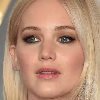

In [57]:
path="C:/Users/rutuj/Capstone project/test_images_processed/Jeniffer_Lawrence/Jeniffer_Lawrence.jpg"
img=image.load_img(path, target_size=(100, 100))
img

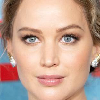

In [58]:
path="C:/Users/rutuj/Capstone project/imageTest/test_image1.jpg"
img=image.load_img(path, target_size=(100, 100))
img

In [59]:
path="C:/Users/rutuj/Capstone project/test_images_processed/Jeniffer_Lawrence/Jeniffer_Lawrence.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction1 = model.predict(x)

path="C:/Users/rutuj/Capstone project/imageTest/test_image1.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction2 = model.predict(x)

pred1 = prediction1.tolist()
pred2 = prediction2.tolist()
pred1 = pred1[0]
pred2 = pred2[0]

pred1.extend(pred2)
embed = np.array(pred1)
embed.reshape((1, 256)).shape
embed = min_max_scaler.transform(embed.reshape((1, 256)))

predLast = (model2.predict(embed) > 0.5).astype("int32")
predLast

array([[1]])

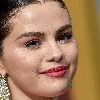

In [47]:
path="C:/Users/rutuj/Capstone project/test_images_processed/Selena_Gomez/Selena_Gomez.jpg"
img=image.load_img(path, target_size=(100, 100))
img

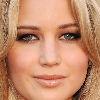

In [48]:
path="C:/Users/rutuj/Capstone project/imageTest/test_image2.jpg"
img=image.load_img(path, target_size=(100, 100))
img

In [49]:
path="C:/Users/rutuj/Capstone project/test_images_processed/Selena_Gomez/Selena_Gomez.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction1 = model.predict(x)

path="C:/Users/rutuj/Capstone project/imageTest/test_image2.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction2 = model.predict(x)

pred1 = prediction1.tolist()
pred2 = prediction2.tolist()
pred1 = pred1[0]
pred2 = pred2[0]

pred1.extend(pred2)
embed = np.array(pred1)
embed.reshape((1, 256)).shape
embed = min_max_scaler.transform(embed.reshape((1, 256)))

predLast = (model2.predict(embed) > 0.5).astype("int32")
predLast

array([[0]])

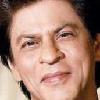

In [53]:
path="C:/Users/rutuj/Capstone project/test_images_processed/Shahrukh_Khan/Shahrukh_Khan.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size
img

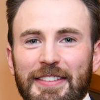

In [54]:
path="C:/Users/rutuj/Capstone project/test_images_processed/Chris_evans/Chris_evans.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size
img

In [52]:
path="C:/Users/rutuj/Capstone project/test_images_processed/Shahrukh_Khan/Shahrukh_Khan.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction1 = model.predict(x)

path="C:/Users/rutuj/Capstone project/test_images_processed/Chris_evans/Chris_evans.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction2 = model.predict(x)

pred1 = prediction1.tolist()
pred2 = prediction2.tolist()
pred1 = pred1[0]
pred2 = pred2[0]

pred1.extend(pred2)
embed = np.array(pred1)
embed.reshape((1, 256)).shape
embed = min_max_scaler.transform(embed.reshape((1, 256)))

predLast = (model2.predict(embed) > 0.5).astype("int32")
predLast

array([[0]])

In [44]:
nameDir = [name for name in os.listdir('our_images/')]
for fname in nameDir:
    directory = fname
    parent_dir = "C:/Users/rutuj/Capstone project/our_images_proc/"
    path = os.path.join(parent_dir, directory)
    os.mkdir(path)
    dirlist = [name for name in os.listdir('our_images/'+fname+'/')]
    for fName in dirlist:
        pixels = imread('C:/Users/rutuj/Capstone project/our_images/'+fname+'/'+fName)
        classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
        bboxes = classifier.detectMultiScale(pixels)
        if len(bboxes) == 0:
            continue
        box = bboxes[0]
        x, y, width, height = box
        x2, y2 = x + width, y + height
        if height < 100 or width < 100:
            continue
        img = Image.open('C:/Users/rutuj/Capstone project/our_images/'+fname+'/'+fName)
        img.crop((x, y, x2, y2)).save('our_images_proc/'+fname+'/'+fName)

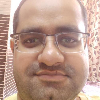

In [30]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Umang/Umang1.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size
img

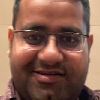

In [31]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Umang/Umang4.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size
img

In [47]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Umang/Umang1.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction1 = model.predict(x)

path="C:/Users/rutuj/Capstone project/our_images_proc/Umang/Umang4.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction2 = model.predict(x)

pred1 = prediction1.tolist()
pred2 = prediction2.tolist()
pred1 = pred1[0]
pred2 = pred2[0]

pred1.extend(pred2)
embed = np.array(pred1)
embed.reshape((1, 256)).shape
embed = min_max_scaler.transform(embed.reshape((1, 256)))

predLast = (model2.predict(embed) > 0.5).astype("int32")
predLast

array([[1]])

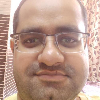

In [49]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Umang/Umang1.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size
img

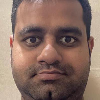

In [50]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Umang/Umang5.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size
img

In [52]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Umang/Umang1.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction1 = model.predict(x)

path="C:/Users/rutuj/Capstone project/our_images_proc/Umang/Umang5.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction2 = model.predict(x)

pred1 = prediction1.tolist()
pred2 = prediction2.tolist()
pred1 = pred1[0]
pred2 = pred2[0]

pred1.extend(pred2)
embed = np.array(pred1)
embed.reshape((1, 256)).shape
embed = min_max_scaler.transform(embed.reshape((1, 256)))

predLast = (model2.predict(embed) > 0.5).astype("int32")
predLast

array([[1]])

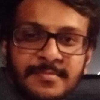

In [35]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Rutuj/Rutuj1.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size
img

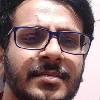

In [36]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Rutuj/Rutuj3.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size
img

In [39]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Rutuj/Rutuj1.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction1 = model.predict(x)

path="C:/Users/rutuj/Capstone project/our_images_proc/Rutuj/Rutuj3.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction2 = model.predict(x)

pred1 = prediction1.tolist()
pred2 = prediction2.tolist()
pred1 = pred1[0]
pred2 = pred2[0]

pred1.extend(pred2)
embed = np.array(pred1)
embed.reshape((1, 256)).shape
embed = min_max_scaler.transform(embed.reshape((1, 256)))

predLast = (model2.predict(embed) > 0.5).astype("int32")
predLast

array([[1]])

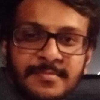

In [37]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Rutuj/Rutuj1.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size
img

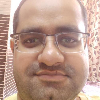

In [38]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Umang/Umang1.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size
img

In [44]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Rutuj/Rutuj1.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction1 = model.predict(x)

path="C:/Users/rutuj/Capstone project/our_images_proc/Umang/Umang1.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction2 = model.predict(x)

pred1 = prediction1.tolist()
pred2 = prediction2.tolist()
pred1 = pred1[0]
pred2 = pred2[0]

pred1.extend(pred2)
embed = np.array(pred1)
embed.reshape((1, 256)).shape
embed = min_max_scaler.transform(embed.reshape((1, 256)))

predLast = (model2.predict(embed) > 0.5).astype("int32")
predLast

array([[0]])

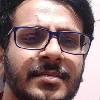

In [26]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Rutuj/Rutuj3.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size
img

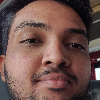

In [33]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Yuvraj/Yuvraj1.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size
img

In [32]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Rutuj/Rutuj3.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction1 = model.predict(x)

path="C:/Users/rutuj/Capstone project/our_images_proc/Yuvraj/Yuvraj1.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction2 = model.predict(x)

pred1 = prediction1.tolist()
pred2 = prediction2.tolist()
pred1 = pred1[0]
pred2 = pred2[0]

pred1.extend(pred2)
embed = np.array(pred1)
embed.reshape((1, 256)).shape
embed = min_max_scaler.transform(embed.reshape((1, 256)))

predLast = (model2.predict(embed) > 0.5).astype("int32")
predLast

array([[0]])

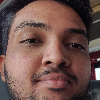

In [30]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Yuvraj/Yuvraj1.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size
img

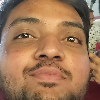

In [31]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Yuvraj/Yuvraj2.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size
img

In [40]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Yuvraj/Yuvraj1.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction1 = model.predict(x)

path="C:/Users/rutuj/Capstone project/our_images_proc/Yuvraj/Yuvraj2.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction2 = model.predict(x)

pred1 = prediction1.tolist()
pred2 = prediction2.tolist()
pred1 = pred1[0]
pred2 = pred2[0]

pred1.extend(pred2)
embed = np.array(pred1)
embed.reshape((1, 256)).shape
embed = min_max_scaler.transform(embed.reshape((1, 256)))

predLast = (model2.predict(embed) > 0.5).astype("int32")
predLast

array([[1]])

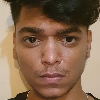

In [46]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Prasad/Prasad1.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size
img

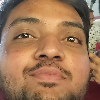

In [47]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Yuvraj/Yuvraj2.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size
img

In [45]:
path="C:/Users/rutuj/Capstone project/our_images_proc/Prasad/Prasad1.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction1 = model.predict(x)

path="C:/Users/rutuj/Capstone project/our_images_proc/Yuvraj/Yuvraj2.jpg"
img=image.load_img(path, target_size=(100, 100)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)

prediction2 = model.predict(x)

pred1 = prediction1.tolist()
pred2 = prediction2.tolist()
pred1 = pred1[0]
pred2 = pred2[0]

pred1.extend(pred2)
embed = np.array(pred1)
embed.reshape((1, 256)).shape
embed = min_max_scaler.transform(embed.reshape((1, 256)))

predLast = (model2.predict(embed) > 0.5).astype("int32")
predLast

array([[0]])